1.	In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course.

#### Machine learning is applying different methods to achieve three different things. One, to draw causal insights -answering the "Why?" question. Two, to predict future events better and three, to finally understand patterns in data. Machine learning can be used when to predict either a target variable or use input features. In supervised machine learning, one is predicting a target variable - it is defined by the fact that they have a target variable which supervises what the model is optimizing for.  In unsupervised machine learning, input features are being used to identify groups of similar observations. Basically, if only one variable is known, and you want to use that to make a model or predict the behavior of similar types. The goal of machine learning is either inference or prediction. In inference, the goal is to provide interpretable insights while in prediction, the goal is to predict, with the highest accuracy, if something is going to happen. For example, they used an example of seeing if an account is fraudulent. In inference, the goal would be to see if it is likely that an account and others like it will be fraudulent. In prediction, the goal would be to see if a specific account is fraudulent. In order to use machine learning, there has to be enough data and the data has to be clean so that they output is also clean and easy to understand. It is also good to know what is being predicted. Machine learning shouldn't be the first solution a business uses; when all the data is fully understood and simpler models can be used on it, machine learning can then be used on other data that is more complex. 

2.	Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques.

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns

pd.options.display.max_columns = None
import time
from time import perf_counter

lending = pd.read_csv('../loans_full_schema.csv')
lending.head(200)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,NaN,NaN,NJ,MORTGAGE,82000.0,Verified,18.09,NaN,NaN,NaN,1,5.0,1998,5,28,16,366648,38119,1,0,NaN,0,609,2,5,2.0,16,0.0,0,1,7500,17,12,2,4,82.1,0,0,other,individual,20000,36,19.03,733.43,D,D3,Feb-2018,Current,fractional,Cash,18294.92,2912.58,1705.08,1207.50,0.0
196,supervisor,10.0,TX,RENT,82000.0,Source Verified,7.08,NaN,NaN,NaN,0,NaN,2010,6,16,14,32200,10401,0,0,NaN,0,0,1,15,4.0,14,0.0,0,10,26700,15,13,11,0,100.0,0,0,credit_card,individual,30000,36,16.01,1054.86,C,C5,Mar-2018,Current,fractional,Cash,28009.85,3137.90,1990.15,1147.75,0.0
197,microbiology labratory security,0.0,CA,OWN,27000.0,Not Verified,2.54,NaN,NaN,NaN,0,NaN,1999,0,5,3,15600,1364,0,0,NaN,0,0,0,0,NaN,3,0.0,0,2,15000,3,3,2,0,100.0,0,0,other,individual,3600,36,6.72,110.70,A,A3,Jan-2018,Current,fractional,Cash,3142.20,552.16,457.80,94.36,0.0
198,telecommunications analyst,3.0,TX,MORTGAGE,92000.0,Not Verified,25.33,NaN,NaN,NaN,0,NaN,2001,1,33,8,260226,51302,0,1,NaN,0,0,4,6,8.0,8,0.0,0,2,37200,13,3,2,2,100.0,0,1,home_improvement,individual,20000,36,6.07,609.08,A,A2,Mar-2018,Current,whole,Cash,18468.54,1800.27,1531.46,268.81,0.0


### Using ordinal encoding for the 'grade' column; current values are A,B,C,D,E,F,G. 

In [106]:
grade_map = {'A': 1, 'B': 2, 'C': 3, 'D':4, 'E':5, 'F':6, 'G':7}
lending['grade']=lending['grade'].map(grade_map)
lending.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,3,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,3,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,4,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,1,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,3,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


### Nominal preprocessing. Columns that be encoded nominally include homeownership, verified_income, initial_listing, and disbursement count, to name a few. 

In [107]:
from sklearn.preprocessing import LabelEncoder
class_labels = LabelEncoder()

lending['homeownership']=class_labels.fit_transform(lending['homeownership'].values)
lending.head(20)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,0,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,3,C3,Mar-2018,Current,whole,Cash,27015.86,1999.330000,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,2,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,3,C1,Feb-2018,Current,whole,Cash,4651.37,499.120000,348.63,150.49,0.0
2,assembly,3.0,WI,2,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,4,D1,Feb-2018,Current,fractional,Cash,1824.63,281.800000,175.37,106.43,0.0
3,customer service,1.0,PA,2,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,1,A3,Jan-2018,Current,whole,Cash,18853.26,3312.890000,2746.74,566.15,0.0
4,security supervisor,10.0,CA,2,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,3,C3,Mar-2018,Current,whole,Cash,21430.15,2324.650000,1569.85,754.80,0.0
5,NaN,NaN,KY,1,34000.0,Not Verified,6.46,NaN,NaN,NaN,1,3.0,1990,6,32,12,42100,3898,0,0,60.0,0,0,0,2,5.0,12,0.0,0,1,27200,27,12,5,3,78.1,0,0,other,individual,5000,36,6.72,153.75,1,A3,Jan-2018,Current,whole,Cash,4256.71,873.130000,743.29,129.84,0.0
6,hr,10.0,MI,0,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,0,NaN,2004,1,12,10,291852,18916,0,0,NaN,0,0,2,1,9.0,10,0.0,0,3,9100,8,7,6,2,100.0,0,0,credit_card,joint,24000,60,13.59,553.35,3,C2,Jan-2018,Current,whole,Cash,22560.00,2730.510000,1440.00,1290.51,0.0
7,police,10.0,AZ,0,110000.0,Source Verified,16.19,NaN,NaN,NaN,1,19.0,2005,1,30,15,342336,60805,0,0,71.0,0,0,2,4,7.0,15,NaN,0,5,22250,16,12,10,7,93.0,0,0,debt_consolidation,individual,20000,60,11.99,444.79,2,B5,Jan-2018,Current,whole,Cash,19005.39,1765.840000,994.61,771.23,0.0
8,parts,10.0,NV,0,65000.0,Source Verified,36.48,NaN,NaN,NaN,1,18.0,1998,3,35,21,283190,69561,0,0,18.0,0,0,6,10,4.0,21,0.0,0,11,36700,19,14,14,2,97.1,0,0,home_improvement,individual,20000,36,13.59,679.58,3,C2,Feb-2018,Current,whole,Cash,18156.66,2703.220000,1843.34,859.88,0.0
9,4th person,3.0,IL,2,30000.0,Not Verified,18.91,NaN,NaN,NaN,0,NaN,2001,0,9,6,33114,17768,0,0,NaN,0,0,1,5,17.0,6,0.0,0,3,14700,7,5,3,0,100.0,0,0,credit_card,individual,6400,36,6.71,196.77,1,A3,Mar-2018,Current,fractional,Cash,6077.13,391.150000,322.87,68.28,0.0


### Using one hot encoding for verified_income, initial_listing_count, and disbursement_method

In [108]:
lending_onehot = pd.get_dummies(lending[['grade','homeownership','verified_income', 'initial_listing_status', 'disbursement_method']])
lending_onehot.head(20)

,grade,homeownership,verified_income_Not Verified,verified_income_Source Verified,verified_income_Verified,initial_listing_status_fractional,initial_listing_status_whole,disbursement_method_Cash,disbursement_method_DirectPay
0,3,0,0,0,1,0,1,1,0
1,3,2,1,0,0,0,1,1,0
2,4,2,0,1,0,1,0,1,0
3,1,2,1,0,0,0,1,1,0
4,3,2,0,0,1,0,1,1,0
5,1,1,1,0,0,0,1,1,0
6,3,0,0,1,0,0,1,1,0
7,2,0,0,1,0,0,1,1,0
8,3,0,0,1,0,0,1,1,0
9,1,2,1,0,0,1,0,1,0


3.	Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words. 

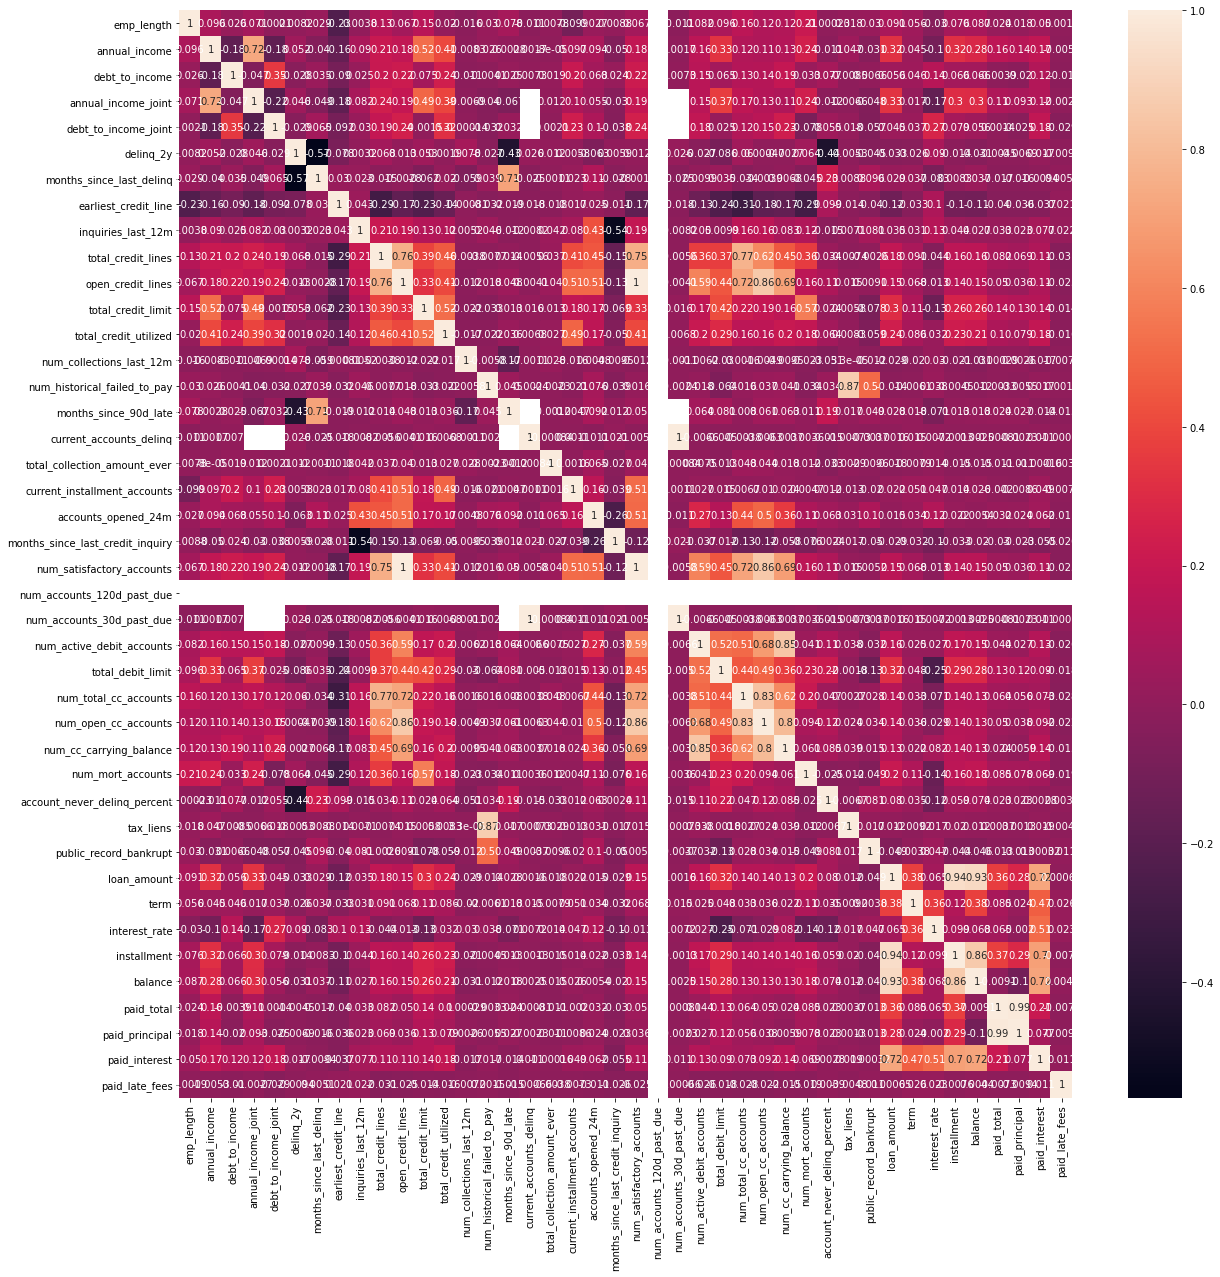

In [124]:
corr_matrix = lending.corr()

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, annot = True)

plt.show()

#### The correlation matrix heatmap shows the correlation between the numerical columns and the heatmap shows how strongly correlated each feature is to the other. The lighter the color, the more strongly correlated and positively correlated two features are. To pick a few of the features that are strongly correlated with each other: loan amount vs installment has a correlation value of 0.94 - so they are positively, strongly correlated. Paid interest vs. paid loan amount also has a strong correlation. On the other hand, as two features become negatively correlated, their value will get closer to -1.0 - and we can see that based on how dark the color is. 

4.	Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes. 

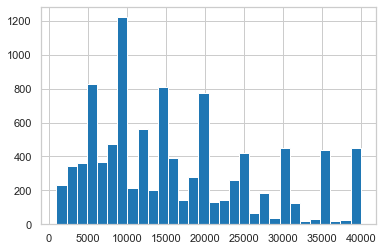

In [151]:
plt.hist(lending['loan_amount'], bins = 30)
plt.show()

#### The histogram shows that the most loan amount being taken out is 10,000 dollars. After that it is 15,000 and 20,000. I chose the bin sizes by just looking at how the histograms changed. When choosing large bin sizes, the spikes were thin and hard to see. I chose 30 as the bin size because it gave a cleaner interperetation and still see the most important loan amounts. 

5.	Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function.

a.	Is there a better way to do this than with a lambda? 

b.	Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown. 

#### Using the Agricultural Research Service to differentiate which states are in which regions. 
#### Creating a function might be an easier way than a lambda.
#### I used map and apply and both seem equally performant - except the map function seems to run a little faster than the apply function.

In [127]:
pacific = ['WA', 'OR','CA','NV','ID','UT','AZ','HI','AK']
plains = ['MT','ND','SD','WY','CO','NM','TX','OK','KS','NE']
midwest = ['MN','IA','MO','WI','IL','MI','IN','OH','KY']
northeast = ['ME','VT','NH','MA','CT','RI','NJ','PA','WV','VA','MD','DE','NY', 'DC']
south = ['AR', 'LA', 'TN', 'MS', 'AL','GA','FL','SC','NC']


start = time.perf_counter()
lending['region'] = lending['state'].map(lambda x: "Plains"  if x in plains else ("Midwest" if x in midwest else ("Pacific" if x in pacific else ("South" if x in south else "Northeast"))))
stop = time.perf_counter()
print(stop-start)
lending

start1 = time.perf_counter()
lending['region2'] = lending['state'].apply(lambda x: "Plains"  if x in plains else ("Midwest" if x in midwest else ("Pacific" if x in pacific else ("South" if x in south else "Northeast"))))
start2 = time.perf_counter()
print(start2 - start1)
lending

0.009773562007467262
0.009783444998902269


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,region,region2
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,Northeast,Northeast
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,Pacific,Pacific
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,Midwest,Midwest
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,Northeast,Northeast
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,Pacific,Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,0,NaN,2008,5,44,13,199195,77963,0,1,NaN,0,0,3,8,6.0,13,0.0,0,4,44600,22,9,4,1,100.0,0,1,other,individual,24000,36,7.35,744.90,A,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0,Plains,Plains
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,4,9.0,1994,1,28,15,382061,101571,0,0,9.0,0,0,3,0,1.0,15,0.0,0,5,28200,18,11,8,2,82.1,0,0,debt_consolidation,individual,10000,36,19.03,366.72,D,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0,Northeast,Northeast
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,2,6.0,2004,0,18,11,346402,95421,0,0,NaN,0,0,3,4,16.0,11,0.0,0,5,14900,9,7,5,2,72.2,0,0,debt_consolidation,joint,30000,36,23.88,1175.10,E,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0,Northeast,Northeast
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,0,NaN,1999,1,38,15,294475,27641,0,0,NaN,0,0,2,2,5.0,15,0.0,0,1,46000,15,9,2,6,100.0,0,0,other,individual,24000,36,5.32,722.76,A,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0,Midwest,Midwest


6.	Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.

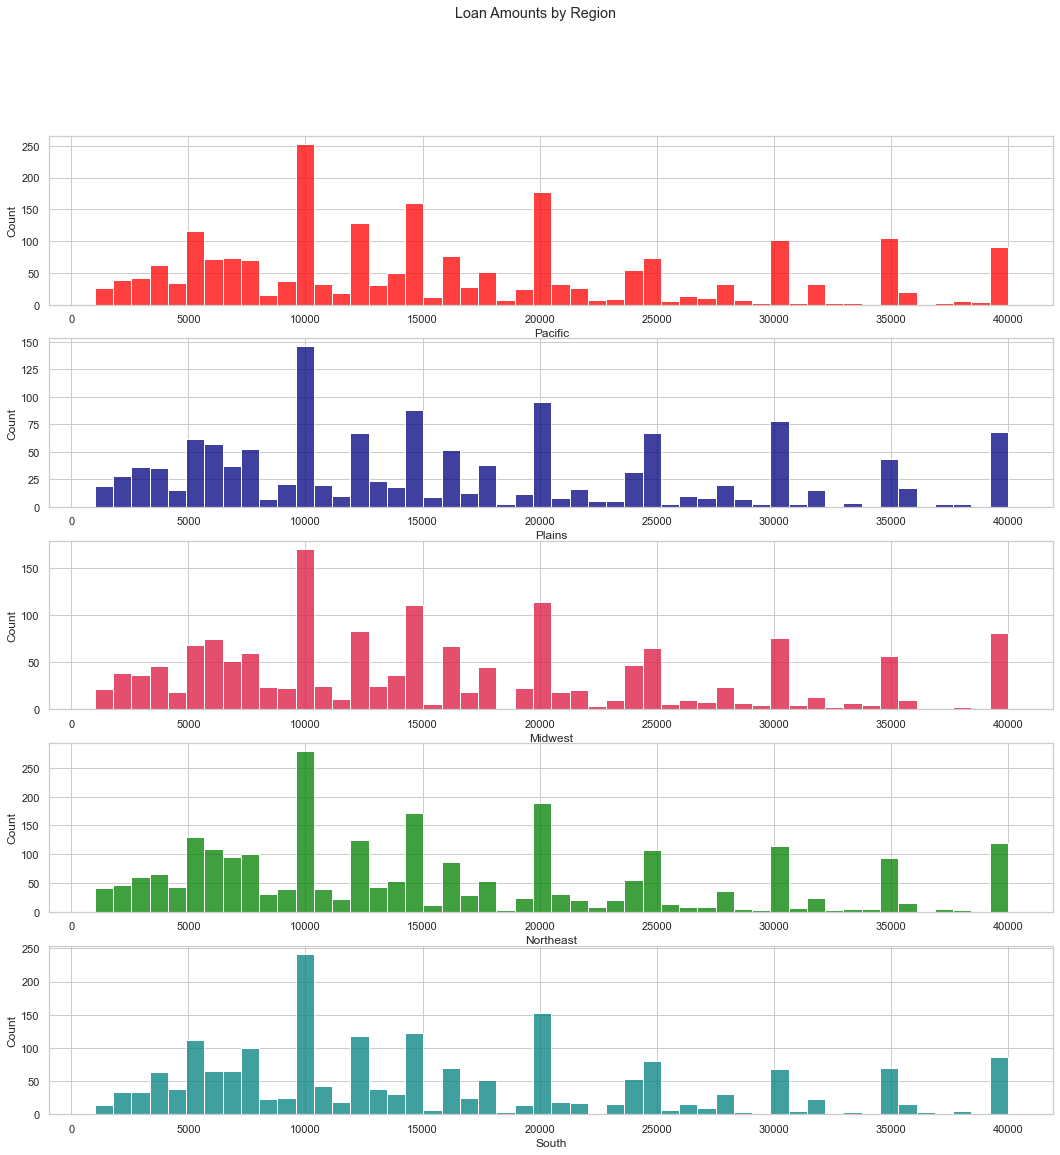

In [149]:
sns.set_style("whitegrid")
sns.set_context("notebook")

fig, axes = plt.subplots(5, 1, figsize=(18,18), sharey = False)
fig.suptitle("Loan Amounts by Region")

#subplots

sns.histplot(ax = axes[0], data = lending[lending['region'] == "Pacific"], x='loan_amount',bins=50,color= 'red')
axes[0].set(xlabel="Pacific")

sns.histplot(ax=axes[1], data = lending[lending['region'] == "Plains"], x = "loan_amount", bins=50, color = "navy")
axes[1].set(xlabel = "Plains")

sns.histplot(ax=axes[2], data = lending[lending['region'] == "Midwest"], x = "loan_amount", bins=50, color = "crimson")
axes[2].set(xlabel = "Midwest")

sns.histplot(ax=axes[3], data = lending[lending['region'] == "Northeast"], x = "loan_amount", bins=50, color = "green")
axes[3].set(xlabel = "Northeast")

sns.histplot(ax=axes[4], data = lending[lending['region'] == "South"], x = "loan_amount", bins=50, color = "teal")
axes[4].set(xlabel = "South")
plt.show()

#### The most common loan amount across all regions is 10,000. We can also see that loan amounts in the higher number aren't taken out as often, which makes sense because it's harder to get those. Then next common loan amounts are 15,000, and 20,000. 